In [1]:
import pandas as pd

# <center> ========= PART 1: OBTAIN THE DATA =========


In [2]:
!ls "../Datos CSV"

21-12-21-datos.csv                   ctcount-acces-data-RAW-2020-data.csv
conteto-personas-RAW-2020.csv


In [3]:
df = pd.read_csv("../Datos CSV/21-12-21-datos.csv",
                 sep=";",
                 decimal=",",
                 parse_dates=['time_index'],
                 dayfirst=True,
                 index_col="time_index").drop(["ocupacion"], axis=1)

ocupacion = pd.read_csv("../Datos CSV/ctcount-acces-data-RAW-2020-data.csv",
                 sep=",",
                 decimal=",",
                 parse_dates=['time_index'],
                 dayfirst=True,
                 index_col="time_index").drop(["endpoint", "devicename"], axis=1)
ocupacion['ocupacion'] = pd.to_numeric(ocupacion['numberofincoming']) - pd.to_numeric(ocupacion['numberofoutgoing'])

In [4]:
display(df)
display(ocupacion)

,temperature,relativehumidity,pm25,pm10,numberofincoming,numberofoutgoing,co2
time_index,,,,,,,
2021-09-27 10:00:00,27.34,49.74,11.88,13.00,68.0,88.0,594.85
2021-09-27 10:25:00,27.66,49.45,6.75,7.75,186.0,265.0,590.77
2021-09-27 10:30:00,27.94,49.70,5.38,6.38,354.0,492.0,578.66
2021-09-27 10:35:00,28.03,48.59,4.71,5.71,80.0,114.0,581.25
2021-09-27 10:40:00,28.09,48.43,3.62,4.62,467.0,642.0,586.75
...,...,...,...,...,...,...,...
2021-12-31 23:35:00,18.81,50.12,19.40,20.40,0.0,0.0,409.35
2021-12-31 23:40:00,18.82,50.13,19.80,20.80,0.0,0.0,408.84
2021-12-31 23:45:00,18.78,50.07,20.80,21.80,0.0,0.0,408.72


,numberofincoming,numberofoutgoing,ocupacion
time_index,,,
2021-09-23 07:06:29,2.00,2.00,0.0
2021-09-23 07:07:29,2.00,2.00,0.0
2021-09-23 07:08:29,2.00,2.00,0.0
2021-09-23 07:09:29,2.00,2.00,0.0
2021-09-23 07:10:29,2.00,2.00,0.0
...,...,...,...
2022-01-31 23:55:57,0.00,0.00,0.0
2022-01-31 23:56:57,0.00,0.00,0.0
2022-01-31 23:57:57,0.00,0.00,0.0


<AxesSubplot:xlabel='time_index'>

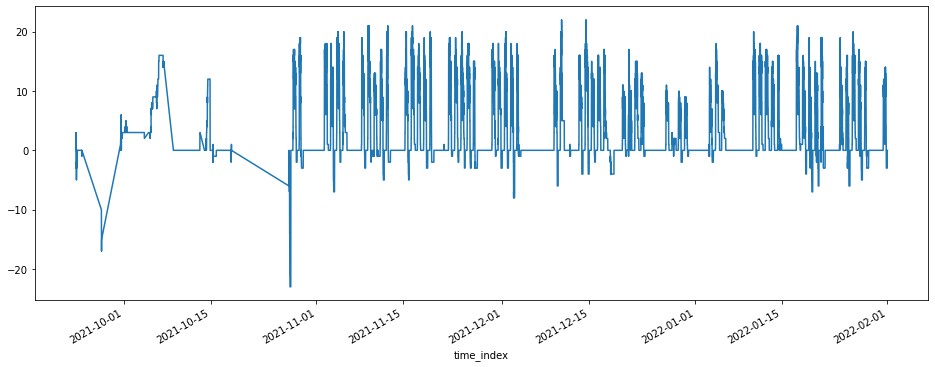

In [5]:
ocupacion.ocupacion.plot.line(figsize=(16, 6))

In [6]:
ocupacion = ocupacion.set_index(ocupacion.index.round('5min'))    # Round every moment to the nearest 5 minute interval
ocupacion = ocupacion.groupby(["time_index"]).mean() # Select the most frequecuent value to each  5 minute interval
ocupacion

,ocupacion
time_index,
2021-09-23 07:05:00,0.0
2021-09-23 07:10:00,0.0
2021-09-23 07:15:00,0.0
2021-09-23 07:20:00,0.0
2021-09-23 07:25:00,0.0
...,...
2022-01-31 23:40:00,0.0
2022-01-31 23:45:00,0.0
2022-01-31 23:50:00,0.0


In [7]:
df_final = df.join(ocupacion, how='left').drop(["numberofincoming", "numberofoutgoing"], axis=1)

In [8]:
df_final

,temperature,relativehumidity,pm25,pm10,co2,ocupacion
time_index,,,,,,
2021-09-27 10:00:00,27.34,49.74,11.88,13.00,594.85,-10.000000
2021-09-27 10:25:00,27.66,49.45,6.75,7.75,590.77,-16.000000
2021-09-27 10:30:00,27.94,49.70,5.38,6.38,578.66,-15.272727
2021-09-27 10:35:00,28.03,48.59,4.71,5.71,581.25,-17.000000
2021-09-27 10:40:00,28.09,48.43,3.62,4.62,586.75,-16.272727
...,...,...,...,...,...,...
2021-12-31 23:35:00,18.81,50.12,19.40,20.40,409.35,0.000000
2021-12-31 23:40:00,18.82,50.13,19.80,20.80,408.84,0.000000
2021-12-31 23:45:00,18.78,50.07,20.80,21.80,408.72,0.000000


<AxesSubplot:xlabel='time_index'>

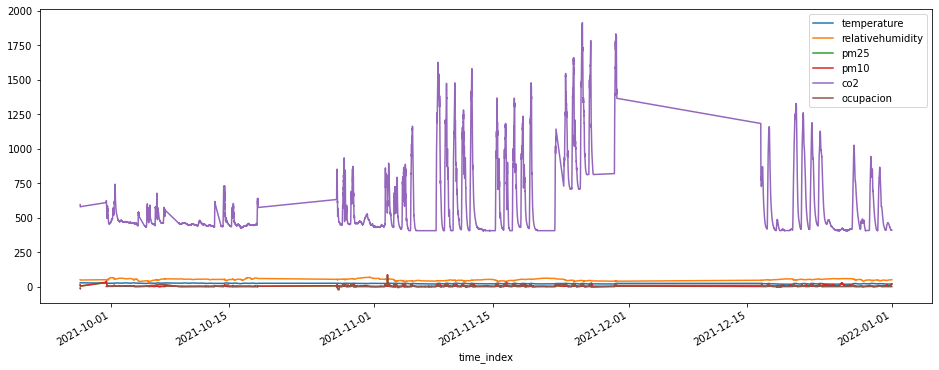

In [9]:
df_final.plot.line(figsize=(16, 6))

## Train data

<AxesSubplot:xlabel='time_index'>

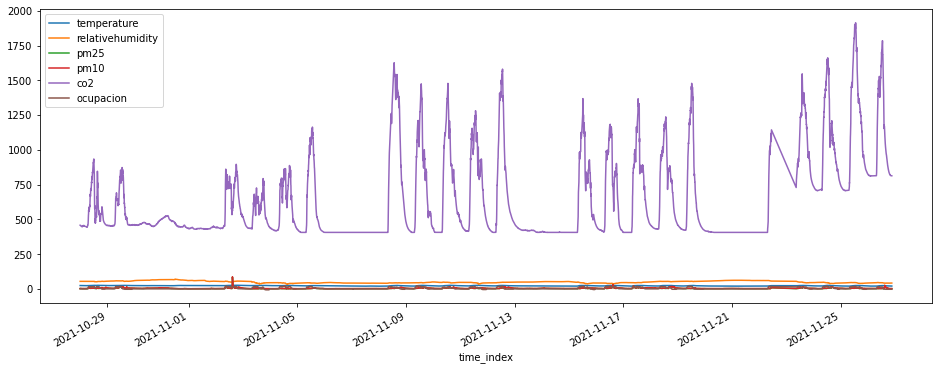

In [10]:
df_train = df_final.loc['2021-10-28':'2021-11-28']
df_train.plot.line(figsize=(16, 6))

<AxesSubplot:xlabel='time_index'>

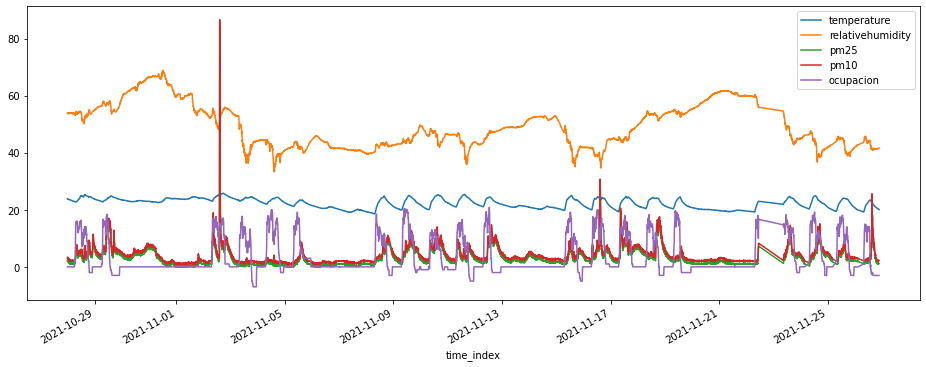

In [11]:
df_train.drop(["co2"], axis=1).plot.line(figsize=(16, 6))

## Test data

<AxesSubplot:xlabel='time_index'>

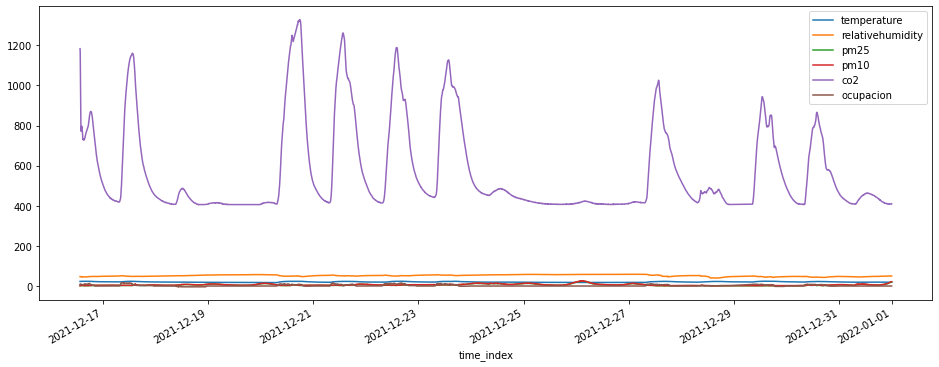

In [12]:
df_test  = df_final.loc['2021-12-10':'2021-12-31']
df_test.plot.line(figsize=(16, 6))

<AxesSubplot:xlabel='time_index'>

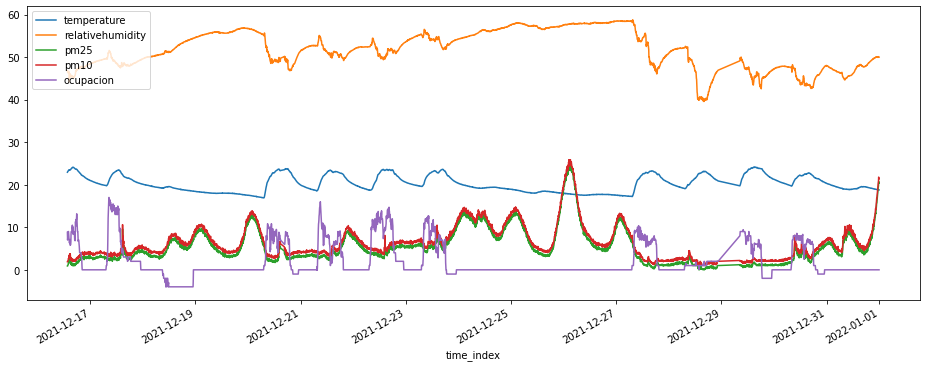

In [13]:
df_test.drop(["co2"], axis=1).plot.line(figsize=(16, 6))

# <center> ========= PART 2: FEATURE ENG. =========

## 2.1 Normalice

## 2.2 Create lags

In [27]:
def create_lags(df, min, max):

    df_x = pd.DataFrame()
    df_y = pd.DataFrame()
    
    for var_name in df.columns:
        for lag in range(min,(max+1)):
            
            if lag<0: # Negative lag -> Positive shift (move downwards) -> Data becomes the past
                new_var_name = var_name + "_prev" + str(-lag*5) + "mins"
                df_x[new_var_name] = df[var_name].shift(-lag)
            elif lag==0:
                new_var_name = var_name + "_actual"
                df_x[new_var_name] = df[var_name]
            elif lag>0: # Positive lag -> Negative shift (move upwards) -> Data becomes the future
                if var_name in ["co2", "pm10", "pm25"]:
                    new_var_name = var_name + "_next" + str(lag*5) + "mins"
                    df_y[new_var_name] = df[var_name].shift(-lag)

    
    # FINAL POST PROCESING: REMOVE MISSING VALUES (from head and tail)
    return df_x.dropna(axis='rows'), df_y.dropna(axis='rows')

train_x, train_y = create_lags(df_train, min=-3, max=4)
test_x,  test_y  = create_lags(df_test,  min=-3, max=4)

In [28]:
print("Train X"); display(train_x.head())
print("Train Y"); display(train_y.head())

Train X


,temperature_prev15mins,temperature_prev10mins,temperature_prev5mins,temperature_actual,relativehumidity_prev15mins,relativehumidity_prev10mins,relativehumidity_prev5mins,relativehumidity_actual,pm25_prev15mins,pm25_prev10mins,...,pm10_prev5mins,pm10_actual,co2_prev15mins,co2_prev10mins,co2_prev5mins,co2_actual,ocupacion_prev15mins,ocupacion_prev10mins,ocupacion_prev5mins,ocupacion_actual
time_index,,,,,,,,,,,,,,,,,,,,,
2021-10-28 00:15:00,23.85,23.87,23.84,23.81,53.88,53.88,53.82,53.77,2.00,2.29,...,3.43,3.00,457.68,457.62,456.57,456.17,0.0,0.0,0.0,0.0
2021-10-28 00:20:00,23.87,23.84,23.81,23.80,53.88,53.82,53.77,53.83,2.29,2.43,...,3.00,3.00,457.62,456.57,456.17,455.89,0.0,0.0,0.0,0.0
2021-10-28 00:25:00,23.84,23.81,23.80,23.80,53.82,53.77,53.83,53.78,2.43,2.00,...,3.00,3.00,456.57,456.17,455.89,455.26,0.0,0.0,0.0,0.0
2021-10-28 00:30:00,23.81,23.80,23.80,23.74,53.77,53.83,53.78,53.73,2.00,2.00,...,3.00,3.00,456.17,455.89,455.26,453.98,0.0,0.0,0.0,0.0
2021-10-28 00:35:00,23.80,23.80,23.74,23.71,53.83,53.78,53.73,53.69,2.00,2.00,...,3.00,2.86,455.89,455.26,453.98,453.58,0.0,0.0,0.0,0.0


Train Y


,pm25_next5mins,pm25_next10mins,pm25_next15mins,pm25_next20mins,pm10_next5mins,pm10_next10mins,pm10_next15mins,pm10_next20mins,co2_next5mins,co2_next10mins,co2_next15mins,co2_next20mins
time_index,,,,,,,,,,,,
2021-10-28 00:00:00,2.29,2.43,2.00,2.00,3.29,3.43,3.00,3.00,457.62,456.57,456.17,455.89
2021-10-28 00:05:00,2.43,2.00,2.00,2.00,3.43,3.00,3.00,3.00,456.57,456.17,455.89,455.26
2021-10-28 00:10:00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,3.00,456.17,455.89,455.26,453.98
2021-10-28 00:15:00,2.00,2.00,2.00,1.86,3.00,3.00,3.00,2.86,455.89,455.26,453.98,453.58
2021-10-28 00:20:00,2.00,2.00,1.86,2.12,3.00,3.00,2.86,3.12,455.26,453.98,453.58,453.01


## 2.3 Create deltas

# <center> ========= PART 3: MODEL =========

In [16]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
>>> X, y = load_linnerud(return_X_y=True)
>>> regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)